<a href="https://colab.research.google.com/github/iamBehzad/Machin-Vision-and-Image-Processing/blob/main/Skin_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

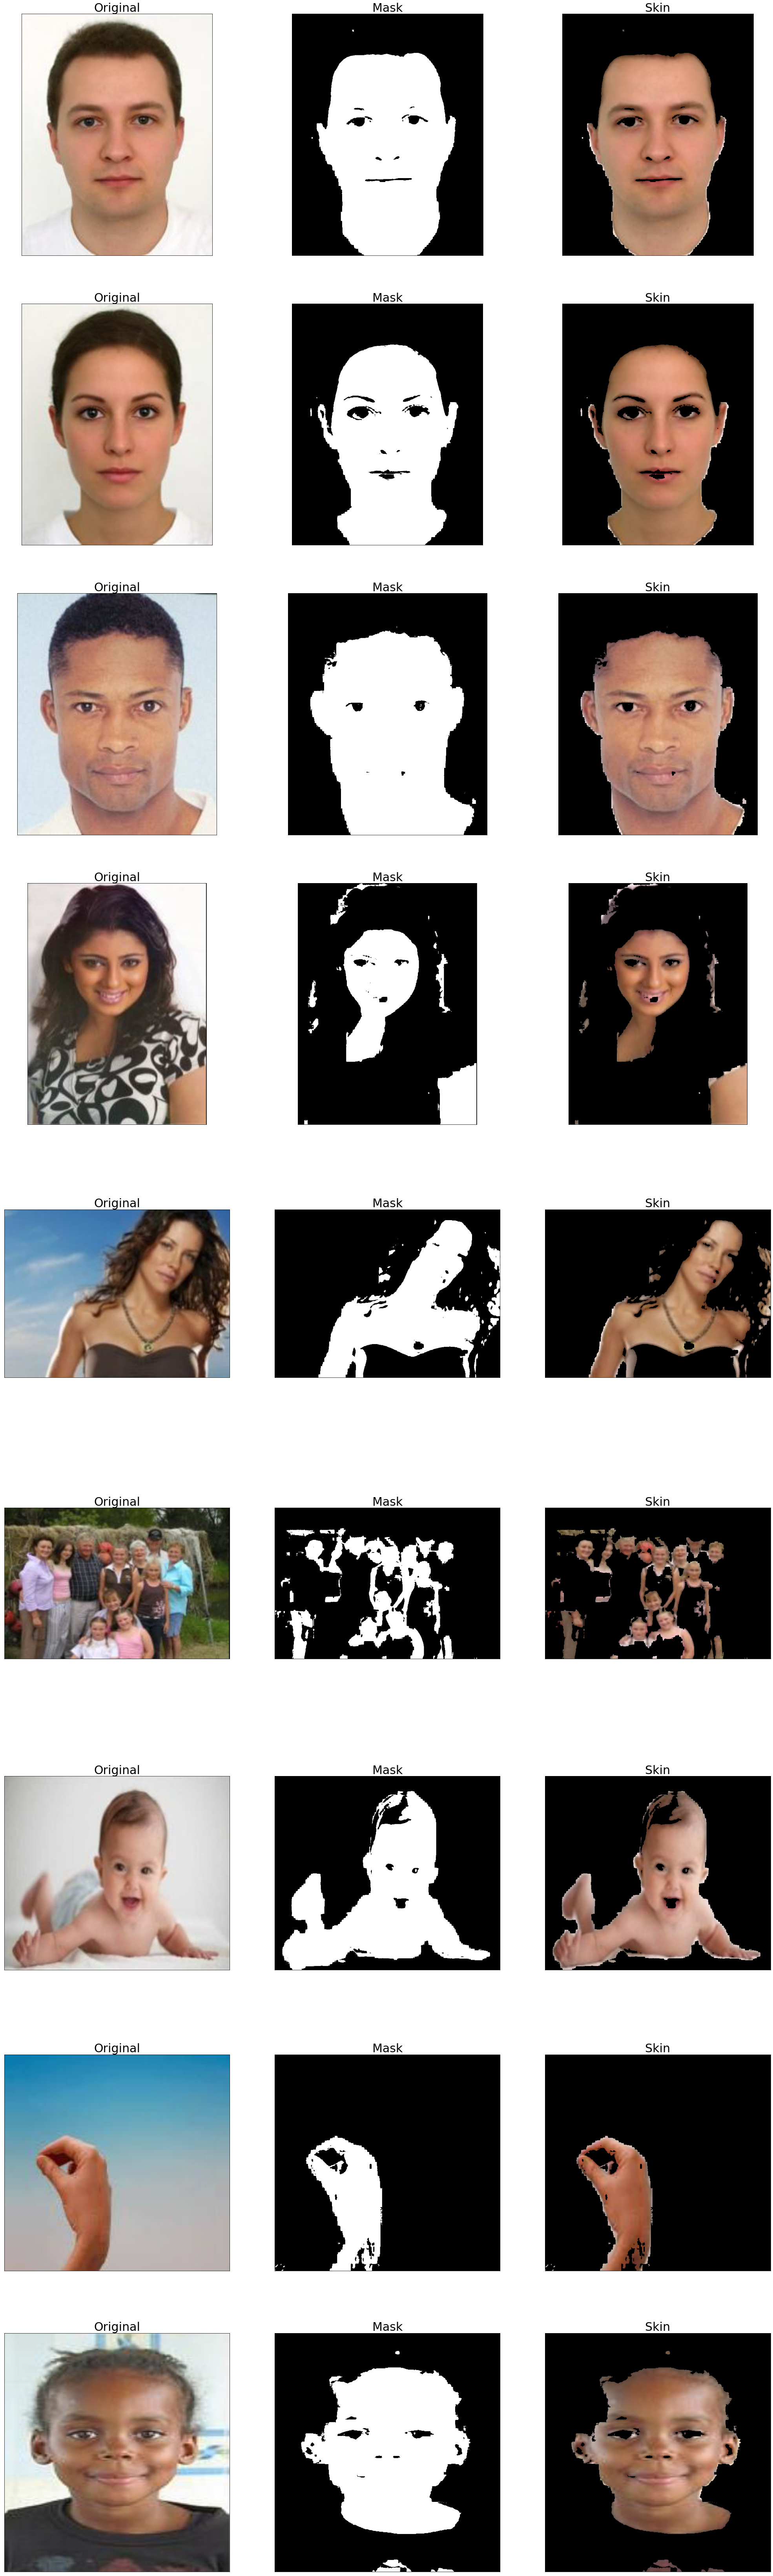

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=[35,120])

for i in range(9):
    
    filename="00"+str(i+1)+".png"
    input_image = cv2.imread(filename)
    
    hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
    YCbCr =cv2.cvtColor(input_image, cv2.COLOR_BGR2YCrCb)
    
    b,g,r = cv2.split(input_image)
    h,s,v = cv2.split(hsv)
    Y,Cr,Cb = cv2.split(YCbCr)

    mask1 = ((h >= 0) & (h <= 50) & (s/255 >= 0.23) & (s/255 <= 0.68) &
            (r > 95) & (g > 40) & (b > 20) & (r > g) & (r > b) & (abs(r-g) > 15))
    
    mask2 = ((r > 95) & (g > 40) & (b > 20) & (r > g) & (r > b) & (abs(r-g) > 15) &
            (Cr > 135) & (Cb > 85) & (Y > 80) & (Cr <= (1.5862 * Cb) + 20) & (Cr >= (0.3448 * Cb) + 76.2069) &
            (Cr >= (-4.5652 * Cb) + 234.5652) & (Cr <= (-1.15 * Cb) + 301.75) & (Cr <= (-2.2857 * Cb) + 432.85))

    mask = mask1 | mask2

    final=input_image.copy()
    final[~mask] = [0, 0, 0]
  
    k=i*3
    #Original
    plt.subplot(9,3,k+1),plt.imshow(input_image[...,::-1]),
    plt.title("Original",fontsize=30), plt.xticks([]), plt.yticks([])
    #Mask 
    plt.subplot(9,3,k+2),plt.imshow(mask, cmap='gray')
    plt.title("Mask",fontsize=30), plt.xticks([]), plt.yticks([])
    #Skin 
    plt.subplot(9,3,k+3),plt.imshow(final[...,::-1])
    plt.title("Skin",fontsize=30), plt.xticks([]), plt.yticks([])

    

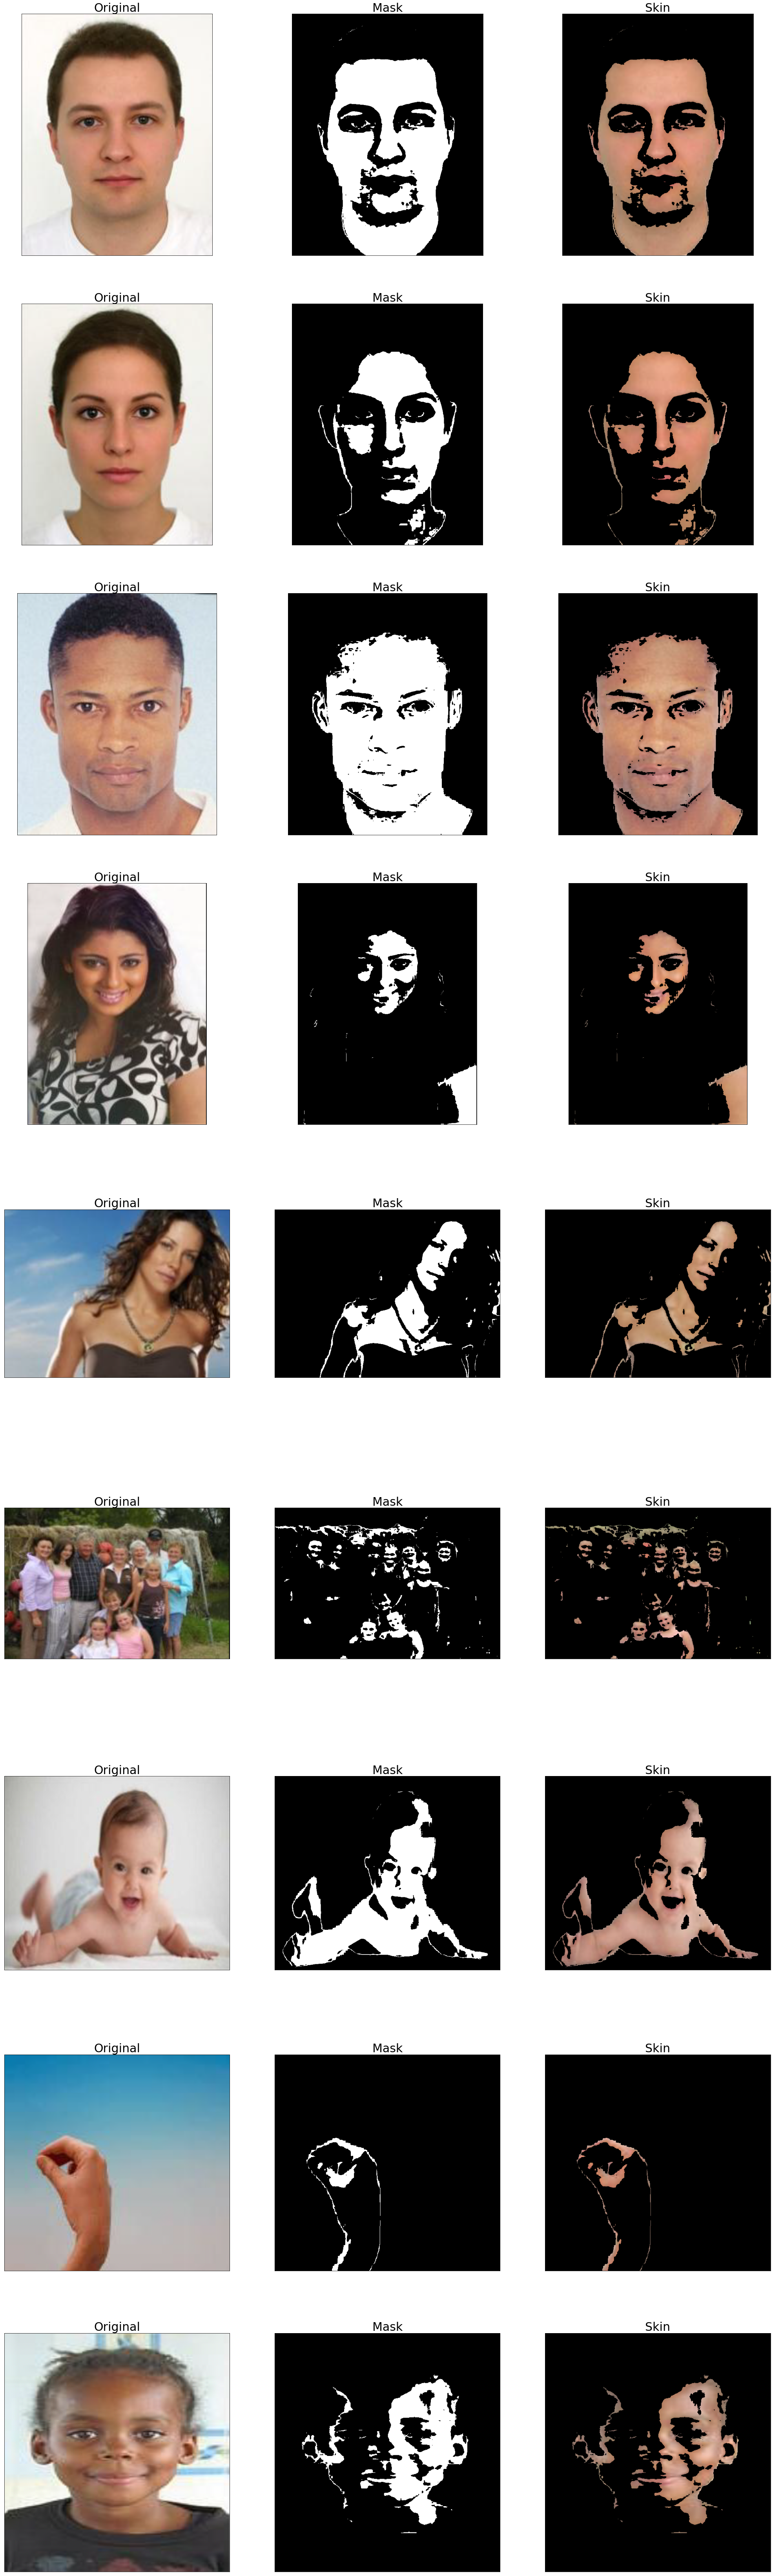

In [ ]:

####################################################################################################################
###########################################پیاده سازی با تابع InRange()################################################
####################################################################################################################

import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=[35,120])

for i in range(9):
    
    filename="00"+str(i+1)+".png"
    input_image = cv2.imread(filename)
    
    rgb=input_image.copy()
    hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
    YCbCr =cv2.cvtColor(input_image, cv2.COLOR_BGR2YCrCb)
    
    LB = np.array([95, 40, 20], dtype = "uint8")
    UB = np.array([255, 255, 255], dtype = "uint8")
    rgb_mask = cv2.inRange(rgb, LB, UB)
    
    LB = np.array([0, 0.23*255, 0], dtype = "uint8")
    UB = np.array([50, 0.68*255, 255], dtype = "uint8")
    hsv_mask = cv2.inRange(hsv, LB, UB)
    
    final_mask=cv2.bitwise_and(rgb_mask, hsv_mask)
    
    skin = cv2.bitwise_and(rgb, rgb, mask = final_mask)
   
    k=i*3
    #Original
    plt.subplot(9,3,k+1),plt.imshow(input_image[...,::-1]),
    plt.title("Original",fontsize=30), plt.xticks([]), plt.yticks([])
    #Mask 
    plt.subplot(9,3,k+2),plt.imshow(final_mask, cmap='gray')
    plt.title("Mask",fontsize=30), plt.xticks([]), plt.yticks([])
    #Skin 
    plt.subplot(9,3,k+3),plt.imshow(skin[...,::-1])
    plt.title("Skin",fontsize=30), plt.xticks([]), plt.yticks([])
